# Bird Paradise

## Current Purpose
We are going to explore the following topics:
* Most popular bird in Oregon (2010, all time)
* Most popular route in Oregon (2010, all time)
* Strongest route (number of total stops by birds, not count of species)

## Future Goals
I want to eventually answer:
* Can we identify which deviations in count patterns fall outside expected outcomes?
    * Ex: Do patterns exist between species? If one goes down, we expect a drop from the other.

#### What data is needed?
* Time series data on yearly counts per species per route (which is unique for each state)
    * Do we know of a seasonality for these migration runs? When is data collected?
* Look into feasability of weather / traffic data provided. 
    * This would need to be broken down into yearly values.

#### What model is needed?
* Use other species' counts as predictors?
* Explore other possible predictors.
* Choose Time Series Model
    * Could be great use of HoltWinters

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import re

%matplotlib inline

**Intial Data Load and Exploration**

In [173]:
#TODO: How did we get routes_clean
oregon = pd.read_csv("./data/Oregon.csv")
routes = pd.read_csv("./data/routes_clean.csv",encoding = "ISO-8859-1")

In [3]:
oregon.head(20)

,countrynum,statenum,Route,RPID,Year,Aou,count10,count20,count30,count40,count50,StopTotal,SpeciesTotal
0,840,69,1,101,1968,2971,0,1,0,0,0,1,1
1,840,69,1,101,1968,3000,0,1,0,0,0,1,1
2,840,69,1,101,1968,3160,1,3,0,0,0,4,4
3,840,69,1,101,1968,3250,0,0,0,0,5,2,5
4,840,69,1,101,1968,3750,1,0,0,0,0,1,1
5,840,69,1,101,1968,3940,1,1,0,0,0,2,2
6,840,69,1,101,1968,4130,1,0,1,1,3,6,6
7,840,69,1,101,1968,4590,0,1,0,0,0,1,1
8,840,69,1,101,1968,4641,7,9,7,0,0,12,23
9,840,69,1,101,1968,4660,11,16,2,8,14,25,51


In [7]:
routes.tail(20)

,countrynum,statenum,Route,RouteName,Active,Latitude,Longitude,Stratum,BCR,LandTypeID,RouteTypeID,RouteTypeDetailId
5632,124,93,54,STRICKLANDLAKE,1,63.87285,-138.12820,68,4,0,1,1
5633,124,93,55,Goldfields,1,63.94314,-139.33650,68,4,5,1,1
5634,124,93,64,DEMPSTERHWY,1,63.99044,-138.75100,68,4,0,1,1
5635,124,93,65,Top-of-the-World,1,64.07250,-139.43887,68,4,5,1,1
5636,124,93,66,SWEDEDOME,1,64.08852,-140.95789,68,4,0,1,1
5637,124,93,78,EAGLERIVER,1,66.44292,-136.71056,68,4,0,1,1
5638,124,93,79,ARCTICCIRCL,1,66.44367,-136.71019,68,4,0,1,1
5639,124,93,107,LITTLERANCHERIA,1,60.20363,-129.55386,68,4,0,1,1
5640,124,93,110,JOHNSONCROSSING,1,60.48948,-133.29451,68,4,0,1,1
5641,124,93,111,MarshLake,1,60.58600,-134.73569,68,4,0,1,1


**Isolate 2010 OR data**

In [8]:
o_2010 = oregon[oregon.Year == 2010]
r_or = routes[routes.statenum == 69]

In [9]:
o_2010.head()

,countrynum,statenum,Route,RPID,Year,Aou,count10,count20,count30,count40,count50,StopTotal,SpeciesTotal
1254,840,69,1,101,2010,2971,0,0,0,0,1,1,1
1255,840,69,1,101,2010,3120,0,1,0,0,0,1,1
1256,840,69,1,101,2010,3940,0,0,0,0,1,1,1
1257,840,69,1,101,2010,4030,1,1,0,0,0,2,2
1258,840,69,1,101,2010,4050,0,1,0,0,0,1,1


In [10]:
r_or.head()

,countrynum,statenum,Route,RouteName,Active,Latitude,Longitude,Stratum,BCR,LandTypeID,RouteTypeID,RouteTypeDetailId
3893,840,69,1,TIMBER,1,45.763850,-123.314961,93,5,0,1,1
3894,840,69,2,TUALATIN,1,45.383660,-122.787557,98,5,0,1,1
3895,840,69,3,SHELLROCK,1,45.078728,-121.921814,67,5,0,1,1
3896,840,69,4,LONEROCK,1,45.446254,-120.702499,89,9,0,1,1
3897,840,69,5,ORDNANCE,0,45.798816,-119.414330,89,9,0,1,1


**Get bird names**

In [172]:
#Initialze bird file
birds_txt = open("./data/SpeciesList.txt","r",encoding = "ISO-8859-1")

In [174]:
# Pull in bird names, and AOU

i=9
end =757
AOU = []
bird_names = []

with open("./data/SpeciesList.txt","r",encoding = "ISO-8859-1") as pipe:
    data = pipe.readlines()
    while i < end:
        AOU.append(int(data[i][6:12]))
        bird_names.append(data[i][12:50].strip())
        
        #Print Checks
        #print("id -> "+data[i][0:6]); print("AUO -> "+data[i][6:12])
        #print("Name -> "+data[i][12:64]); print(data[i][1:50])
        
        i=i+1
pipe.close()

In [181]:
# State Codes
i=11
end =108
state_code = []
state_names = []

with open("./data/RegionCodes.txt","r",encoding = "ISO-8859-1") as pipe:
    data = pipe.readlines()
    while i < end:
        state_code.append(int(data[i][4:20]))
        state_names.append(data[i][20:64].strip())
        
        #Print Checks
        #print("countrynum -> "+data[i][0:3]); print("RegionCode -> "+data[i][4:20])
        #print("Name -> "+data[i][20:64]); 
        #print(data[i][0:50])
        
        i=i+1
pipe.close()

In [184]:
#Make DataFrame
state_map = pd.DataFrame({"statenum":state_code , "StateName":state_names})
bird_map = pd.DataFrame({"Aou":AOU,"names":bird_names})

In [185]:
pd.merge(r_or,state_map,how="left",on='statenum')

,countrynum,statenum,Route,RouteName,Active,Latitude,Longitude,Stratum,BCR,LandTypeID,RouteTypeID,RouteTypeDetailId,StateName
0,840,69,1,TIMBER,1,45.763850,-123.314961,93,5,0,1,1,OREGON
1,840,69,2,TUALATIN,1,45.383660,-122.787557,98,5,0,1,1,OREGON
2,840,69,3,SHELLROCK,1,45.078728,-121.921814,67,5,0,1,1,OREGON
3,840,69,4,LONEROCK,1,45.446254,-120.702499,89,9,0,1,1,OREGON
4,840,69,5,ORDNANCE,0,45.798816,-119.414330,89,9,0,1,1,OREGON
5,840,69,6,ALBEE,1,45.223828,-118.909523,65,10,0,1,1,OREGON
6,840,69,7,FLORA,1,45.654735,-117.275245,65,10,0,1,1,OREGON
7,840,69,8,IMNAHA,1,45.721920,-116.779595,65,9,0,1,1,OREGON
8,840,69,9,SALADO,1,44.550887,-123.802762,93,5,0,1,1,OREGON
9,840,69,10,COOLCAMP,1,44.474035,-122.228053,67,5,0,1,1,OREGON


**Final merge for name data --- 2010**

In [128]:
#Get lat and long for each species counts
or_birds = pd.merge(o_2010,r_or[['Route','RouteName','Latitude','Longitude']], how="left",on='Route')
or_final = pd.merge(or_birds,bird_map,how="left",on="Aou")

In [164]:
oregon_birds = pd.merge(oregon,r_or[['Route','RouteName','Latitude','Longitude']], how="left",on='Route')
oregon_final = pd.merge(oregon_birds,bird_map,how="left",on="Aou")

## Analysis

#### What is the most observed bird in OR?

In [186]:
# In 2010:
#or_final[['RouteName','names','SpeciesTotal']].groupby(by='names').sum().nlargest(5,'SpeciesTotal')

# Overall:
oregon_final[['RouteName','names','SpeciesTotal']].groupby(by='names').sum().nlargest(10,'SpeciesTotal')

,SpeciesTotal
names,
American Robin,90645
Brewer's Blackbird,82211
European Starling,78291
Western Meadowlark,71129
Red-winged Blackbird,60479
Cliff Swallow,49395
(Oregon Junco) Dark-eyed Junco,35223
Swainson's Thrush,34632
Brewer's Sparrow,33399


#### What's the most travelled route in OR?

In [167]:
# In 2010:
or_final[['RouteName','SpeciesTotal']].groupby(by='RouteName').sum().nlargest(5,'SpeciesTotal')

# Overall:
oregon_final[['RouteName','SpeciesTotal']].groupby(by='RouteName').sum().nlargest(5,'SpeciesTotal')

,SpeciesTotal
RouteName,
MODOCPOINT,61953
FISHLAKE,45601
WARNERVALLY,34350
UMPQUA,31301
JOSEPH,30552


#### What route's had the most stops?

In [171]:
# In 2010:
or_final[['RouteName','StopTotal']].groupby(by='RouteName').sum().nlargest(5,'StopTotal')

# Overall:
oregon_final[['RouteName','StopTotal']].groupby(by='RouteName').sum().nlargest(5,'StopTotal')

,StopTotal
RouteName,
UMPQUA,16687
MODOCPOINT,14641
ADAIR,14086
TUALATIN,14040
FISHLAKE,13167


#### ------ Notes --------

In [131]:
or_final[['count10','count20','count30','count40','count50','StopTotal','RouteName']][or_final.names == "Western Meadowlark"]

,count10,count20,count30,count40,count50,StopTotal,RouteName
97,6,4,6,2,0,14,IMNAHA
226,2,0,1,0,2,5,DESCHUTES
269,3,0,0,1,3,6,LOGDELL
311,9,4,0,2,6,13,WICKIUP
361,7,5,8,4,6,24,BRIDGEPORT
466,14,3,3,0,0,12,FANDANGOCAN
497,19,10,6,3,0,23,WAGONTIRE
523,13,13,0,2,2,18,BUCHANAN
553,9,28,12,4,10,27,CROWLEY
668,0,5,2,0,4,8,MODOCPOINT


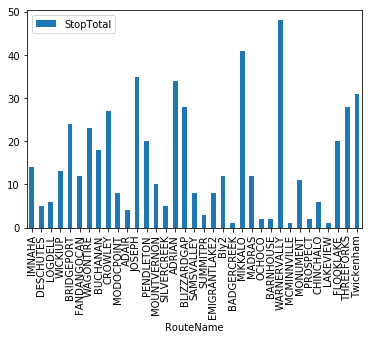

In [138]:
or_final[or_final.names == "Western Meadowlark"].plot.bar(x='RouteName',y='StopTotal')